Для анализа панельных данных мы берем данные из RLMS по индивидам с 1994 по 2019 год. 


Устанавливаем нужные нам пакеты: для манипуляций с данными, для графиков и для работы с панельными данными, для регрессионных табличек

In [41]:
install.packages("tidyverse")
library("tidyverse") 
install.packages("plm")
library("plm")
install.packages("haven")
library(haven)
install.packages("hablar")
library(hablar)
install.packages("jtools")
library("jtools")
install.packages("huxtable")
library("huxtable")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Импортируем данные, которые мы изначально скачали в формате Статы, почистили  варианты ответов "Отказ от ответв" "Нет ответа" "Не знаю" и оставили только интересующие нас перменные

In [97]:
 RLMS_USERS_CLEANED <- read_dta("/content/RLMS_CLEAN.dta")

Наш исследовательский вопрос: как зарплата индивида влияет на его удовлетворенность жизнью и работой? И наши гипотезы: а) чем выше уровень зарплаты, тем выше удовлетворенность работой б) чем выше зарплата, тем выше удовлетворенность жизнью в целом. Зарплата у нас дана в рублях, а удовлетворенность измеряется от 1 до 5, где 1 - понлостью удовлетворен, а 5 - полностью неудовлетворен.  

In [98]:
View(RLMS_USERS_CLEANED)

idind year J1_1_1 J10     M151 M132
1       1    1994 NA      160000 NA   NA  
2       2    1994 NA      600000 NA   NA  
3       3    1994 NA     1200000 NA   NA  
4       4    1994 NA       39000 NA   NA  
5       5    1994 NA          NA NA   NA  
6       6    1994 NA          NA NA   NA  
7       7    1994 NA       49000 NA   NA  
8       8    1994 NA      156000 NA   NA  
9       9    1994 NA      250000 NA   NA  
10     10    1994 NA      400000 NA   NA  
11     11    1994 NA          NA NA   NA  
12     12    1994 NA      150000 NA   NA  
13     13    1994 NA          NA NA   NA  
14     14    1994 NA          NA NA   NA  
15     15    1994 NA          NA NA   NA  
16     16    1994 NA      100000 NA   NA  
17     17    1994 NA      200000 NA   NA  
18     18    1994 NA      280000 NA   NA  
19     19    1994 NA      350000 NA   NA  
20     20    1994 NA          NA NA   NA  
21     21    1994 NA          NA NA   NA  
22     22    1994 NA          NA NA   NA  
23     23    1994 NA          NA NA   NA  
24     24    1994 NA          NA NA   NA  
25     25    1994 NA          NA NA   NA  
26     26    1994 NA          NA NA   NA  
27     27    1994 NA          NA NA   NA  
28     28    1994 NA      205000 NA   NA  
29     29    1994 NA          NA NA   NA  
30     30    1994 NA          NA NA   NA  
⋮      ⋮     ⋮    ⋮      ⋮       ⋮    ⋮   
364357 59378 2019 NA        NA   NA   NA  
364358 59379 2019 NA        NA   NA   NA  
364359 59380 2019 NA        NA   NA   NA  
364360 59381 2019 NA        NA   NA   NA  
364361 59382 2019 NA        NA   NA   NA  
364362 59383 2019  1     25000   NA   NA  
364363 59384 2019 NA        NA   NA   NA  
364364 59385 2019 NA        NA   NA   NA  
364365 59386 2019 NA        NA   NA   NA  
364366 59388 2019 NA        NA   NA   NA  
364367 59389 2019  1     22000   NA   NA  
364368 59390 2019  3     13000   NA   NA  
364369 59391 2019 NA        NA   NA   NA  
364370 59392 2019 NA        NA   NA   NA  
364371 59393 2019  1     40000   NA   NA  
364372 59394 2019  3     69000   NA   NA  
364373 59395 2019 NA        NA   NA   NA  
364374 59398 2019  2     25000   NA   NA  
364375 59400 2019  3     12000   NA   NA  
364376 59401 2019 NA        NA   NA   NA  
364377 59402 2019 NA        NA   NA   NA  
364378 59403 2019 NA        NA   NA   NA  
364379 59406 2019 NA        NA   NA   NA  
364380 59407 2019 NA        NA   NA   NA  
364381 59408 2019 NA        NA   NA   NA  
364382 59409 2019 NA        NA   NA   NA  
364383 59410 2019  1     29000   NA   NA  
364384 59411 2019 NA        NA   NA   NA  
364385 59412 2019 NA        NA   NA   NA  
364386 59413 2019 NA        NA   NA   NA

Конвертируем наши данные после импрота из статы в адекватный формат


In [125]:
RLMS_USERS_CLEANED$year <- as.integer(RLMS_USERS_CLEANED$year)
RLMS_USERS_CLEANED$idind <- as.integer(RLMS_USERS_CLEANED$idind)
RLMS_USERS_CLEANED$J1_1_1 <- as.integer(RLMS_USERS_CLEANED$J1_1_1)
RLMS_USERS_CLEANED$M132 <- as.integer(RLMS_USERS_CLEANED$M151)
RLMS_USERS_CLEANED$J10 <- as.numeric(RLMS_USERS_CLEANED$J10)

In [126]:
View(RLMS_USERS_CLEANED)

idind year J1_1_1 J10     M151 M132 logwage  
1       1    1994 NA      160000 NA   NA   11.98294 
2       2    1994 NA      600000 NA   NA   13.30469 
3       3    1994 NA     1200000 NA   NA   13.99783 
4       4    1994 NA       39000 NA   NA   10.57134 
5       5    1994 NA          NA NA   NA         NA 
6       6    1994 NA          NA NA   NA         NA 
7       7    1994 NA       49000 NA   NA   10.79960 
8       8    1994 NA      156000 NA   NA   11.95762 
9       9    1994 NA      250000 NA   NA   12.42922 
10     10    1994 NA      400000 NA   NA   12.89922 
11     11    1994 NA          NA NA   NA         NA 
12     12    1994 NA      150000 NA   NA   11.91840 
13     13    1994 NA          NA NA   NA         NA 
14     14    1994 NA          NA NA   NA         NA 
15     15    1994 NA          NA NA   NA         NA 
16     16    1994 NA      100000 NA   NA   11.51294 
17     17    1994 NA      200000 NA   NA   12.20608 
18     18    1994 NA      280000 NA   NA   12.54255 
19     19    1994 NA      350000 NA   NA   12.76569 
20     20    1994 NA          NA NA   NA         NA 
21     21    1994 NA          NA NA   NA         NA 
22     22    1994 NA          NA NA   NA         NA 
23     23    1994 NA          NA NA   NA         NA 
24     24    1994 NA          NA NA   NA         NA 
25     25    1994 NA          NA NA   NA         NA 
26     26    1994 NA          NA NA   NA         NA 
27     27    1994 NA          NA NA   NA         NA 
28     28    1994 NA      205000 NA   NA   12.23077 
29     29    1994 NA          NA NA   NA         NA 
30     30    1994 NA          NA NA   NA         NA 
⋮      ⋮     ⋮    ⋮      ⋮       ⋮    ⋮    ⋮        
364357 59378 2019 NA        NA   NA   NA          NA
364358 59379 2019 NA        NA   NA   NA          NA
364359 59380 2019 NA        NA   NA   NA          NA
364360 59381 2019 NA        NA   NA   NA          NA
364361 59382 2019 NA        NA   NA   NA          NA
364362 59383 2019  1     25000   NA   NA   10.126671
364363 59384 2019 NA        NA   NA   NA          NA
364364 59385 2019 NA        NA   NA   NA          NA
364365 59386 2019 NA        NA   NA   NA          NA
364366 59388 2019 NA        NA   NA   NA          NA
364367 59389 2019  1     22000   NA   NA    9.998843
364368 59390 2019  3     13000   NA   NA    9.472782
364369 59391 2019 NA        NA   NA   NA          NA
364370 59392 2019 NA        NA   NA   NA          NA
364371 59393 2019  1     40000   NA   NA   10.596660
364372 59394 2019  3     69000   NA   NA   11.141876
364373 59395 2019 NA        NA   NA   NA          NA
364374 59398 2019  2     25000   NA   NA   10.126671
364375 59400 2019  3     12000   NA   NA    9.392745
364376 59401 2019 NA        NA   NA   NA          NA
364377 59402 2019 NA        NA   NA   NA          NA
364378 59403 2019 NA        NA   NA   NA          NA
364379 59406 2019 NA        NA   NA   NA          NA
364380 59407 2019 NA        NA   NA   NA          NA
364381 59408 2019 NA        NA   NA   NA          NA
364382 59409 2019 NA        NA   NA   NA          NA
364383 59410 2019  1     29000   NA   NA   10.275086
364384 59411 2019 NA        NA   NA   NA          NA
364385 59412 2019 NA        NA   NA   NA          NA
364386 59413 2019 NA        NA   NA   NA          NA

Логарифмируем переменную заработной платы, чтобы получить лог нормальное распрделение


In [127]:
RLMS_USERS_CLEANED$logwage <- log(1+RLMS_USERS_CLEANED$J10)

Распрделение зарплаты до логарифмирования 


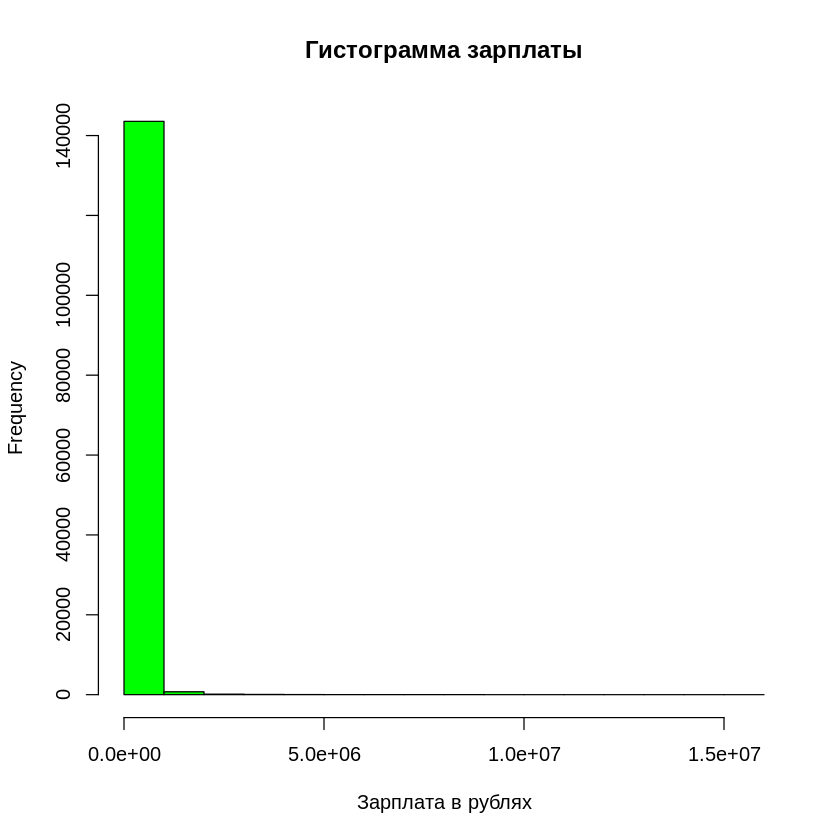

In [128]:
hist(RLMS_USERS_CLEANED$J10, 
          main="Гистограмма зарплаты", 
         xlab="Зарплата в рублях", 
          col="green")

Получаем лог нормальное распрделение

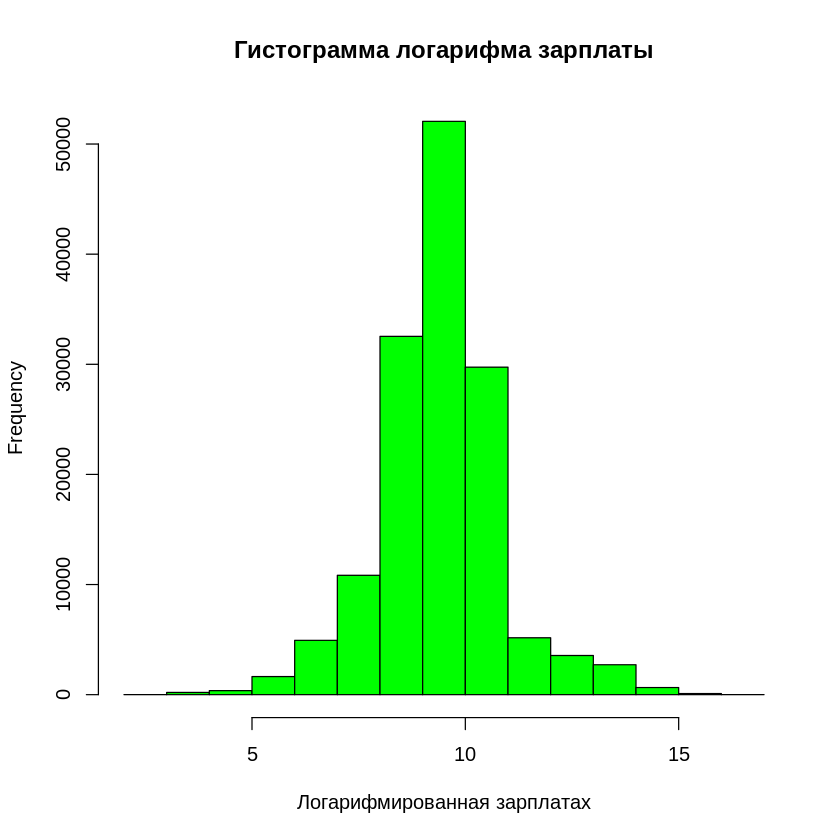

In [129]:
hist(RLMS_USERS_CLEANED$logwage, 
          main="Гистограмма логарифма зарплаты", 
         xlab="Логарифмированная зарплатах", 
          col="green")

Обьявляем наши данные панельными 

In [130]:
panel <- pdata.frame(RLMS_USERS_CLEANED,
                 index = c("idind", "year"),
                 row.names = TRUE)

Визуализируем данные 

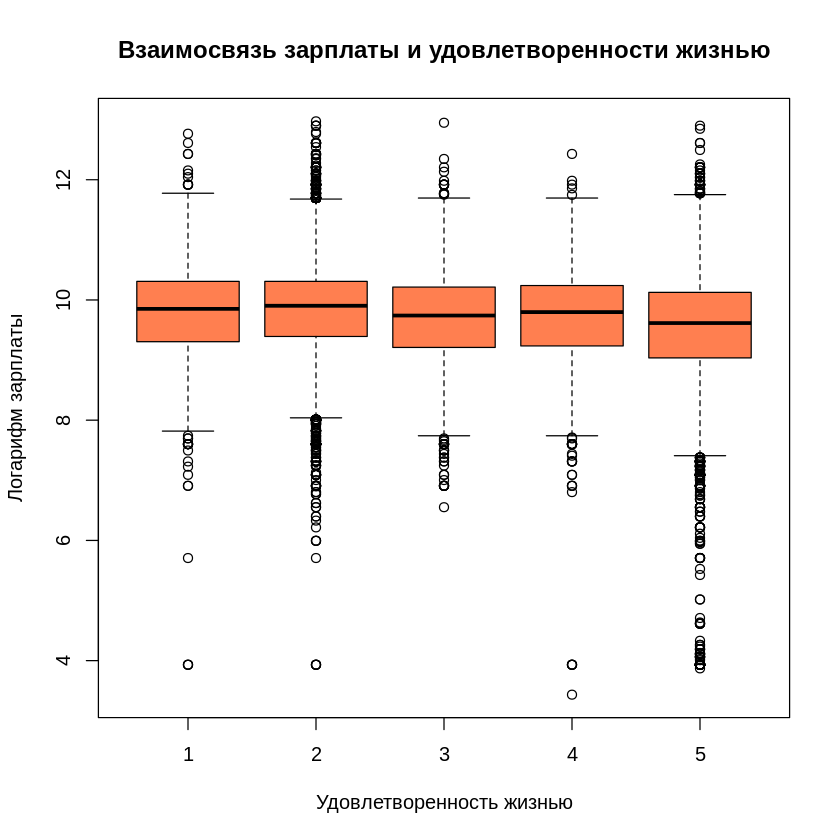

In [131]:
boxplot(logwage ~ M132,
        xlab = "Удовлетворенность жизнью",
        ylab = "Логарифм зарплаты",
        main = "Взаимосвязь зарплаты и удовлетворенности жизнью",
        col = "coral", data = panel)

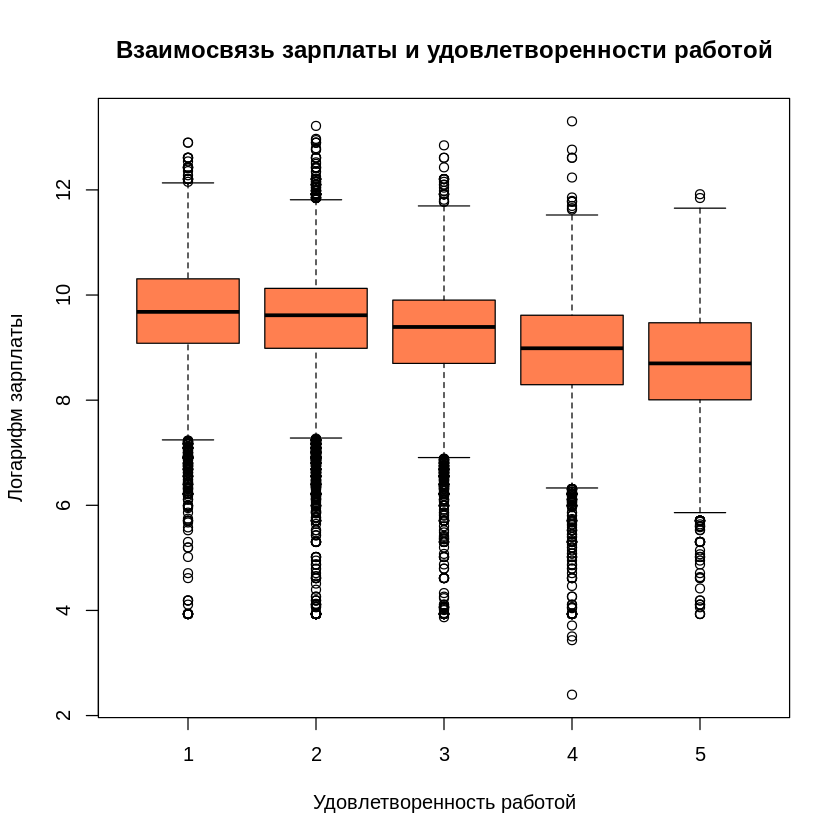

In [132]:
boxplot(logwage ~ J1_1_1,
        xlab = "Удовлетворенность работой",
        ylab = "Логарифм зарплаты",
        main = "Взаимосвязь зарплаты и удовлетворенности работой",
        col = "coral", data = panel)

Мы видим, что чем выше зарплата, тем выше, в среднем, удовлетворенность и жизнью в целом и работой (1 - полностью удовлетворен, 5 - полностью неудовлетворен) 

Оцениваем сквозную (pooled) модель для обеих гипотез

In [133]:
m.pool1 <- plm(J1_1_1~ logwage, data = panel, model = "pooling")
m.pool2 <- plm(M132~ logwage, data = panel, model = "pooling")

In [134]:
summary(m.pool1)
summary(m.pool2)



Pooling Model

Call:
plm(formula = J1_1_1 ~ logwage, data = panel, model = "pooling")

Unbalanced Panel: n = 25803, T = 1-18, N = 124368

Residuals:
    Min.  1st Qu.   Median  3rd Qu.     Max. 
-2.84164 -0.53955 -0.22547  0.62327  3.24197 

Coefficients:
              Estimate Std. Error t-value  Pr(>|t|)    
(Intercept)  4.8674171  0.0259659  187.45 < 2.2e-16 ***
logwage     -0.2608896  0.0027555  -94.68 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    120620
Residual Sum of Squares: 112510
R-Squared:      0.067234
Adj. R-Squared: 0.067227
F-statistic: 8964.33 on 1 and 124366 DF, p-value: < 2.22e-16

Pooling Model

Call:
plm(formula = M132 ~ logwage, data = panel, model = "pooling")

Unbalanced Panel: n = 19593, T = 1-9, N = 74442

Residuals:
    Min.  1st Qu.   Median  3rd Qu.     Max. 
-4.22833 -1.20557 -0.85331  1.59177  2.86368 

Coefficients:
              Estimate Std. Error t-value  Pr(>|t|)    
(Intercept)  6.5840520  0.0664984  99.011 < 2.2e-16 ***
logwage     -0.3448066  0.0068277 -50.501 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    154890
Residual Sum of Squares: 149760
R-Squared:      0.033125
Adj. R-Squared: 0.033112
F-statistic: 2550.33 on 1 and 74440 DF, p-value: < 2.22e-16

Оцениваем Random Effects модель для обеих гипотез


In [136]:
m.random1 <- plm(J1_1_1~ logwage, data = panel, model = "random")
m.random2 <- plm(M132~ logwage, data = panel, model = "random")

In [137]:
summary(m.random1)
summary(m.random2)


Oneway (individual) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = J1_1_1 ~ logwage, data = panel, model = "random")

Unbalanced Panel: n = 25803, T = 1-18, N = 124368

Effects:
                 var std.dev share
idiosyncratic 0.6495  0.8059 0.718
individual    0.2546  0.5046 0.282
theta:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1524  0.3759  0.5083  0.4748  0.5813  0.6477 

Residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2.9705 -0.4935 -0.1444  0.0016  0.4930  3.2147 

Coefficients:
              Estimate Std. Error z-value  Pr(>|z|)    
(Intercept)  4.7140824  0.0289208 163.000 < 2.2e-16 ***
logwage     -0.2451798  0.0030569 -80.205 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    98535
Residual Sum of Squares: 81749
R-Squared:      0.1704
Adj. R-Squared: 0.17039
Chisq: 6432.83 on 1 DF, p-value: < 2.22e-16

Oneway (individual) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = M132 ~ logwage, data = panel, model = "random")

Unbalanced Panel: n = 19593, T = 1-9, N = 74442

Effects:
                 var std.dev share
idiosyncratic 1.2306  1.1093 0.614
individual    0.7722  0.8788 0.386
theta:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2161  0.4662  0.5419  0.4997  0.5924  0.6121 

Residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-3.6972 -0.8362 -0.4378  0.0062  1.0451  2.7208 

Coefficients:
              Estimate Std. Error z-value  Pr(>|z|)    
(Intercept)  5.6783592  0.0742877  76.437 < 2.2e-16 ***
logwage     -0.2539683  0.0076291 -33.290 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    102000
Residual Sum of Squares: 91771
R-Squared:      0.10082
Adj. R-Squared: 0.10081
Chisq: 1108.2 on 1 DF, p-value: < 2.22e-16

Оцениваем Fixed Effects модель для обеих гипотез

In [138]:
m.fixed1 <- plm(J1_1_1~ logwage, data = panel, model = "within")
m.fixed2 <- plm(M132 ~ logwage, data = panel, model = "within")


In [140]:
summary(m.fixed1)
summary(m.fixed2)

Oneway (individual) effect Within Model

Call:
plm(formula = J1_1_1 ~ logwage, data = panel, model = "within")

Unbalanced Panel: n = 25803, T = 1-18, N = 124368

Residuals:
       Min.     1st Qu.      Median     3rd Qu.        Max. 
-3.19305021 -0.42568518 -0.00056384  0.36911681  3.45310392 

Coefficients:
          Estimate Std. Error t-value  Pr(>|t|)    
logwage -0.2272665  0.0038402 -59.181 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    66294
Residual Sum of Squares: 64019
R-Squared:      0.034315
Adj. R-Squared: -0.21849
F-statistic: 3502.45 on 1 and 98564 DF, p-value: < 2.22e-16

Oneway (individual) effect Within Model

Call:
plm(formula = M132 ~ logwage, data = panel, model = "within")

Unbalanced Panel: n = 19593, T = 1-9, N = 74442

Residuals:
    Min.  1st Qu.   Median  3rd Qu.     Max. 
-3.79378 -0.42575  0.00000  0.39478  3.01969 

Coefficients:
         Estimate Std. Error t-value  Pr(>|t|)    
logwage -0.143680   0.010079 -14.255 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    67744
Residual Sum of Squares: 67494
R-Squared:      0.0036913
Adj. R-Squared: -0.35221
F-statistic: 203.21 on 1 and 54848 DF, p-value: < 2.22e-16

Теперь посмотрим на результаты всех наших трех моделей для первой гипотезы. Мы видим, что во всех трех моделях коэффициент перед переменной заработной платы значим на уровне 1% и колеблется от -0 .26 до -0.227

In [141]:
export_summs(m.pool1, m.fixed1, m.random1, scale = TRUE)

names                                                                                                                     
                                                                                                                              
1   (Intercept)                                                                                                               
2                                                                                                                             
3   logwage                                                                                                                   
4                                                                                                                             
1.1 nobs                                                                                                                      
2.1 r.squared                                                                                                                 
3.1 adj.r.squared                                                                                                             
4.1 statistic                                                                                                                 
5   p.value                                                                                                                   
6   deviance                                                                                                                  
7   df.residual                                                                                                               
8   nobs.1                                                                                                                    
.1  All continuous predictors are mean-centered and scaled by 1 standard deviation.  *** p < 0.001;  ** p < 0.01;  * p < 0.05.
    Model 1                                                                                                                   
    Model 1                                                                                                                   
1   4.86741710776799 ***                                                                                                      
2   (0.0259658683681294)                                                                                                      
3   -0.260889601903609 ***                                                                                                    
4   (0.00275548332980643)                                                                                                     
1.1 124368                                                                                                                    
2.1 0.0672340080103472                                                                                                        
3.1 0.0672265078415553                                                                                                        
4.1 8964.33265365796                                                                                                          
5   0                                                                                                                         
6   112514.373860386                                                                                                          
7   124366                                                                                                                    
8   124368                                                                                                                    
.1  All continuous predictors are mean-centered and scaled by 1 standard deviation.  *** p < 0.001;  ** p < 0.01;  * p < 0.05.
    Model 2                                                                                                                   
    Model 2                                                        

И посмотрим на результаты всех наших трех моделей для второй гипотезы. Мы видим, что во всех трех моделях коэффициент перед переменной заработной платы значим на уровне 1% и колеблется от -0 .34 до -0.14


In [142]:
export_summs(m.pool2, m.fixed2, m.random2, scale = TRUE)

names                                                                                                                     
                                                                                                                              
1   (Intercept)                                                                                                               
2                                                                                                                             
3   logwage                                                                                                                   
4                                                                                                                             
1.1 nobs                                                                                                                      
2.1 r.squared                                                                                                                 
3.1 adj.r.squared                                                                                                             
4.1 statistic                                                                                                                 
5   p.value                                                                                                                   
6   deviance                                                                                                                  
7   df.residual                                                                                                               
8   nobs.1                                                                                                                    
.1  All continuous predictors are mean-centered and scaled by 1 standard deviation.  *** p < 0.001;  ** p < 0.01;  * p < 0.05.
    Model 1                                                                                                                   
    Model 1                                                                                                                   
1   6.5840520038887 ***                                                                                                       
2   (0.0664984258621363)                                                                                                      
3   -0.34480658071875 ***                                                                                                     
4   (0.0068277395651416)                                                                                                      
1.1 74442                                                                                                                     
2.1 0.0331253891605789                                                                                                        
3.1 0.0331124005172307                                                                                                        
4.1 2550.33480191677                                                                                                          
5   0                                                                                                                         
6   149759.449068083                                                                                                          
7   74440                                                                                                                     
8   74442                                                                                                                     
.1  All continuous predictors are mean-centered and scaled by 1 standard deviation.  *** p < 0.001;  ** p < 0.01;  * p < 0.05.
    Model 2                                                                                                                   
    Model 2                                                        

Теперь мы хотим сравнить модели и выбрать лучшую для обеих гипотез. Начнем с простого F теста и сравним модель с фиксированными эффектами и сквозную регрессию

In [144]:
pFtest(m.fixed1, m.pool1)
pFtest(m.fixed2, m.pool2)


	F test for individual effects

data:  J1_1_1 ~ logwage
F = 2.8937, df1 = 25802, df2 = 98564, p-value < 2.2e-16
alternative hypothesis: significant effects



	F test for individual effects

data:  M132 ~ logwage
F = 3.4122, df1 = 19592, df2 = 54848, p-value < 2.2e-16
alternative hypothesis: significant effects


Отвергаем нулевую гипотезу о верной сквозной модели в пользу модели с фиксированными эффектами в обоих случаях

Используем тест Хаусмана для сравнения моделей с фиксированными эффектами и со случайными эффектами 

In [145]:
phtest(m.fixed1, m.random1)
phtest(m.fixed2, m.random2)


	Hausman Test

data:  J1_1_1 ~ logwage
chisq = 59.4, df = 1, p-value = 1.287e-14
alternative hypothesis: one model is inconsistent



	Hausman Test

data:  M132 ~ logwage
chisq = 280.34, df = 1, p-value < 2.2e-16
alternative hypothesis: one model is inconsistent


Отвергаем нулевую гипотезу о состоятельности коэффициентов в обеих моделях (fixed и random) в пользу гипотезы о том, что в random модели коэффициенты несостоятельны в обоих случаях

Используем тест Бройша-Пагана для сравнения модели сквозной регрессии и модели со случайными эффектами 

In [147]:
plmtest(m.random1,  type = "bp")
plmtest(m.random2,  type = "bp")


	Lagrange Multiplier Test - (Breusch-Pagan) for unbalanced panels

data:  J1_1_1 ~ logwage
chisq = 28922, df = 1, p-value < 2.2e-16
alternative hypothesis: significant effects



	Lagrange Multiplier Test - (Breusch-Pagan) for unbalanced panels

data:  M132 ~ logwage
chisq = 26286, df = 1, p-value < 2.2e-16
alternative hypothesis: significant effects


Отвергаем  нулевую гипотезу о верности сквозной регресси <=> что ci тождественно равны 0 в обоих случаях


На основании этих тестов мы можем сделать вывод, что лучшей моделью в нашем случае является модель с фиксированными эффектами  для обеих гипотез

Следовательно, по ее результатам мы видим, что а)увеличение зароботной платы на 1% , в среднем, ведет к увеличению удовлетворенностью жизнью на 0.14 б) увеличение зароботной платы на 1%, в среднем,  ведет к увеличению удовлетворенностью работой на 0.227 
Обе наши гипотезы оказались верны (но, конечно, для дальнейшего исслдоевания этого вопроса нужно включать больше обьясняющих переменных, чтобы бороться с проблемой эндогенности)


